# Exploratory Data Analysis & Visualisation
In this notebook, we will do the Data analysis on the cleaned chess dataset

## Import required libraries

In [452]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import lichess.api

In [453]:
chess_df=pd.read_csv("cleaned_games.csv")
chess_df.head(30)

,Unnamed: 0,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,EstDur,Event,RatingDiff
0,10164,False,23,resign,white,10+0,1886,1590,c4 Nf6 Nc3 e6 d4 Bb4 e3 O-O Nf3 c5 Bd3 Qa5 Bd2...,E50,Nimzo-Indian Defense: Normal Variation | Hueb...,10,600,Rapid,296
1,15917,True,108,mate,black,10+0,1886,1864,d4 Nf6 Nc3 e6 e4 d5 e5 Nfd7 f4 c5 Nf3 cxd4 Nxd...,C11,French Defense: Steinitz Variation #2,11,600,Rapid,22
2,16581,True,48,resign,black,10+0,1873,1913,e4 e5 Nf3 f5 d3 Nf6 exf5 Nc6 Bg5 d5 Nc3 Be7 Be...,C40,Latvian Gambit,4,600,Rapid,-40
3,18640,False,8,outoftime,black,20+15,1586,2481,e4 e5 Nf3 Nc6 Bc4 Bc5 O-O Nf6,C50,Giuoco Piano,6,1800,Classical,-895
4,11820,True,64,mate,black,10+0,1610,1635,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Bg5 e6 Bc...,B95,Sicilian Defense: Najdorf Variation,12,600,Rapid,-25
5,8865,True,52,mate,black,10+0,1850,1905,Nf3 Nf6 d4 e6 e3 b6 Nc3 Bb7 b3 Bb4 Bb2 Ne4 Bd3...,A46,Yusupov-Rubinstein System,5,600,Rapid,-55
6,1189,True,57,mate,white,20+0,1547,1564,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5 Bxd5 Qx...,C57,Italian Game: Two Knights Defense | Knight At...,8,1200,Rapid,-17
7,1618,True,56,mate,black,10+0,2030,2164,e4 c5 c4 e5 Nc3 g5 d3 h5 Nf3 f6 h3 Nc6 g3 d6 B...,B20,Sicilian Defense: Staunton-Cochrane Variation,3,600,Rapid,-134
8,11802,True,54,resign,black,10+0,2049,2088,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Bg5 e5 Nb...,B94,Sicilian Defense: Najdorf Variation,11,600,Rapid,-39
9,11339,True,63,resign,white,10+5,1372,1393,d4 d5 c4 c6 Nf3 h6 Nc3 e6 Bf4 Bb4 e3 Bxc3+ bxc...,D11,Slav Defense: Modern Line,5,800,Rapid,-21


### Visualize rated to non-rated matches ratio

From the graph, we can clearly see that most player prefer to play rated games.

<AxesSubplot:xlabel='count', ylabel='rated'>

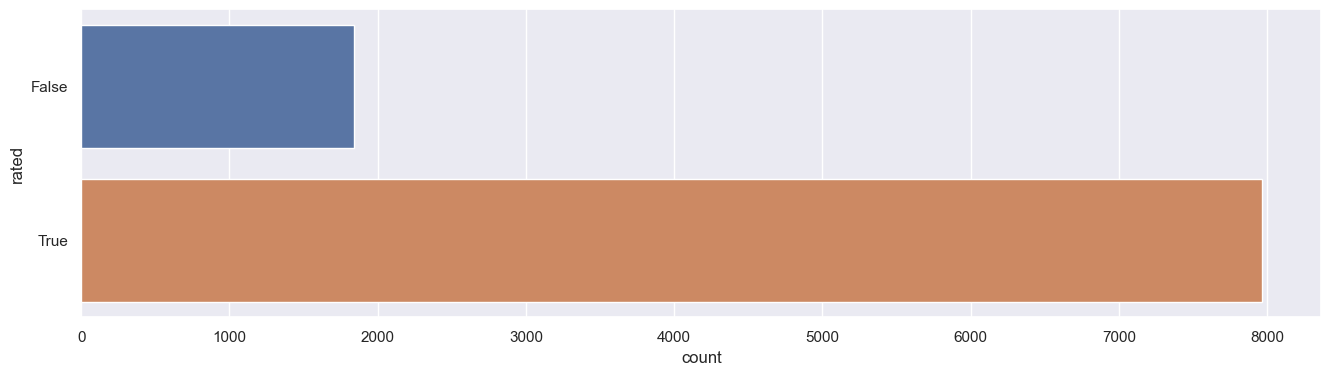

In [454]:
f = plt.figure(figsize=(16, 4))
sb.countplot(y=chess_df["rated"])

### Visualise the ratio of how matches end
Most of the players like to play rated matches. Players tend to resign more and this pattern seems to bo consistent for both rated and non-rated games.

<AxesSubplot:xlabel='victory_status', ylabel='count'>

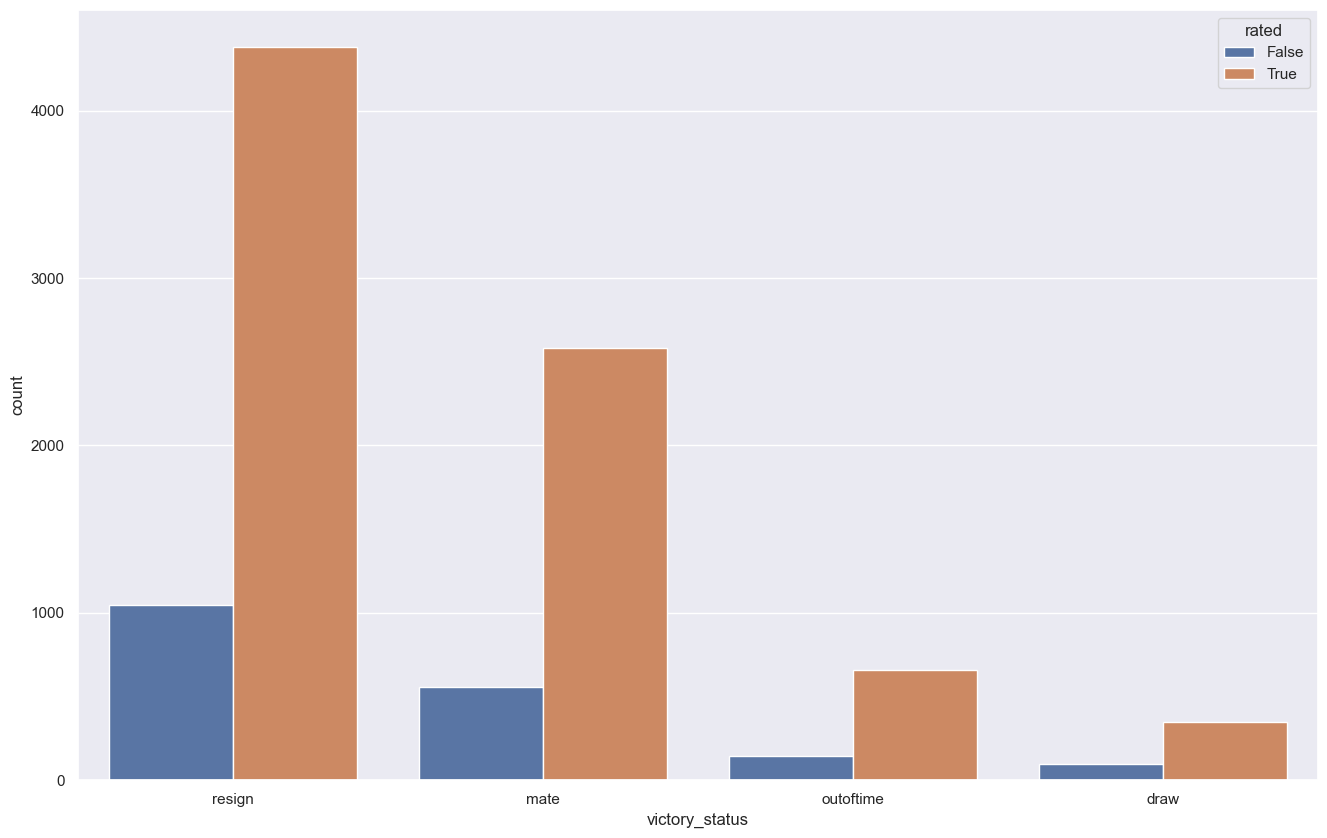

In [455]:
f = plt.figure(figsize=(16, 10))
sb.countplot(data=chess_df,x="victory_status",hue="rated")

### White Rating vs Black Rating
Both White ratings and Black ratings have similar distribution. Their graph is skewed to the left.

<AxesSubplot:xlabel='black_rating', ylabel='Count'>

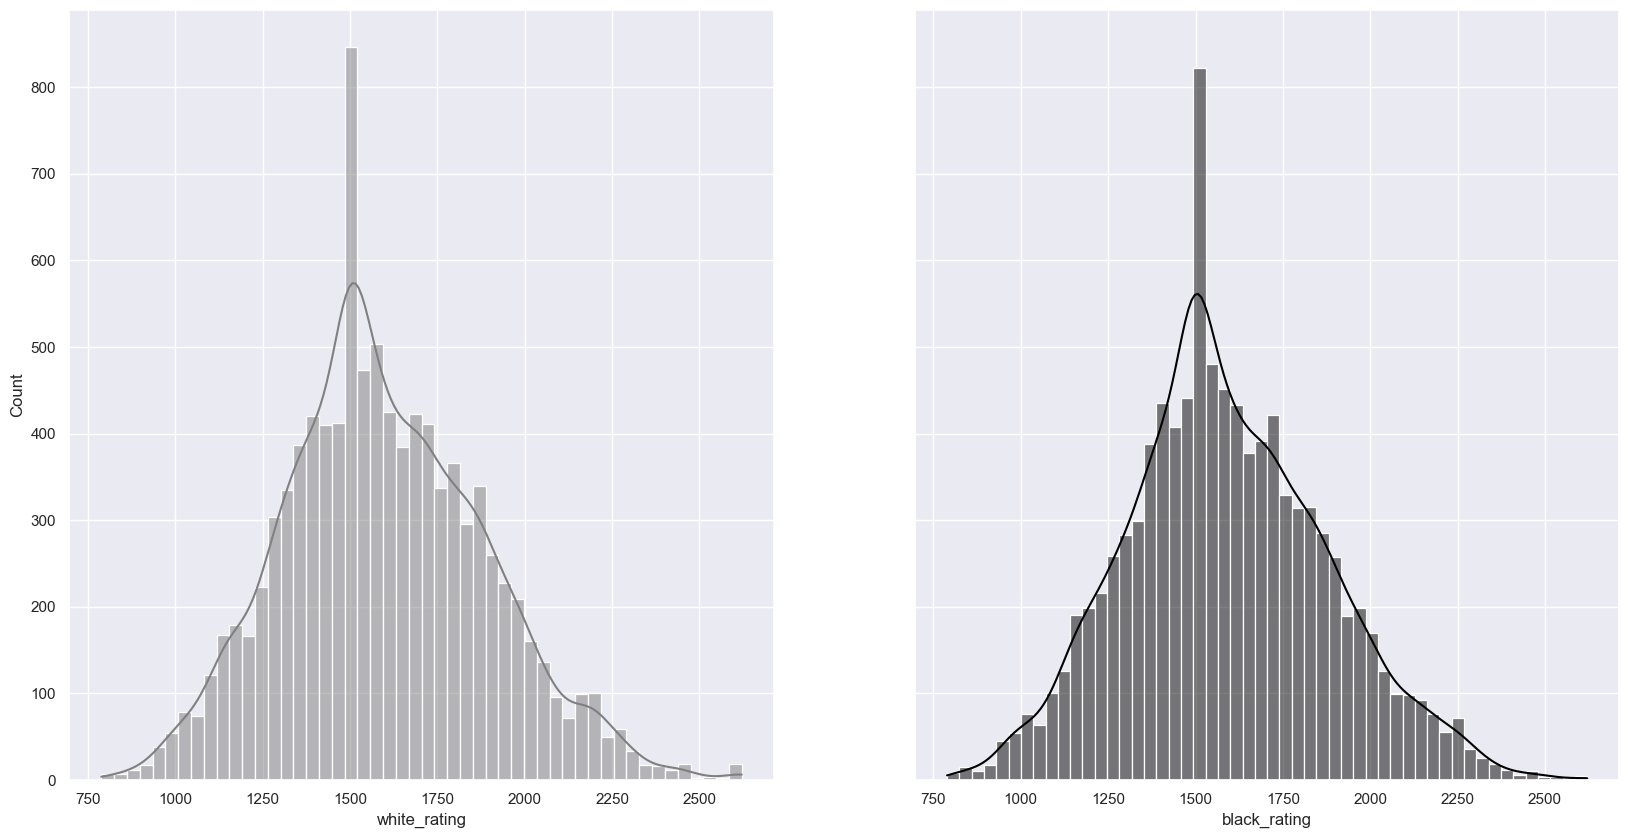

In [456]:
fig, ax = plt.subplots(1,2,figsize=(20,10),sharex='all',sharey='all')
sb.histplot(chess_df['white_rating'], ax=ax[0],kde=True,color="grey")
sb.histplot(chess_df['black_rating'], ax=ax[1],kde=True,color="black")

<AxesSubplot:xlabel='RatingDiff', ylabel='Count'>

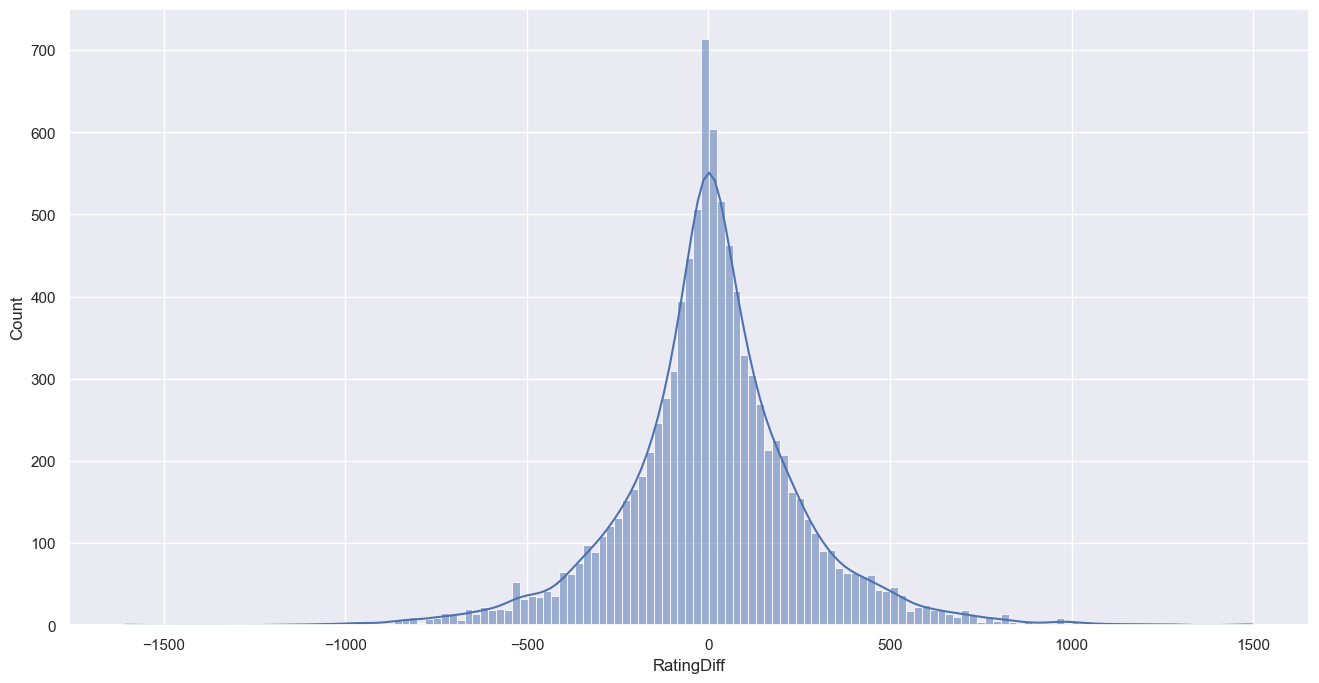

In [457]:
f = plt.figure(figsize=(16, 8))
sb.histplot(chess_df['RatingDiff'],kde=True)

As mentioned in the data cleaning part, we noticed a a normal distribution of the rating difference which shows Lichess' incredible matchmaking process. However, 

In [458]:
abs_RatingDiff=chess_df["RatingDiff"].abs()

<AxesSubplot:xlabel='RatingDiff', ylabel='Count'>

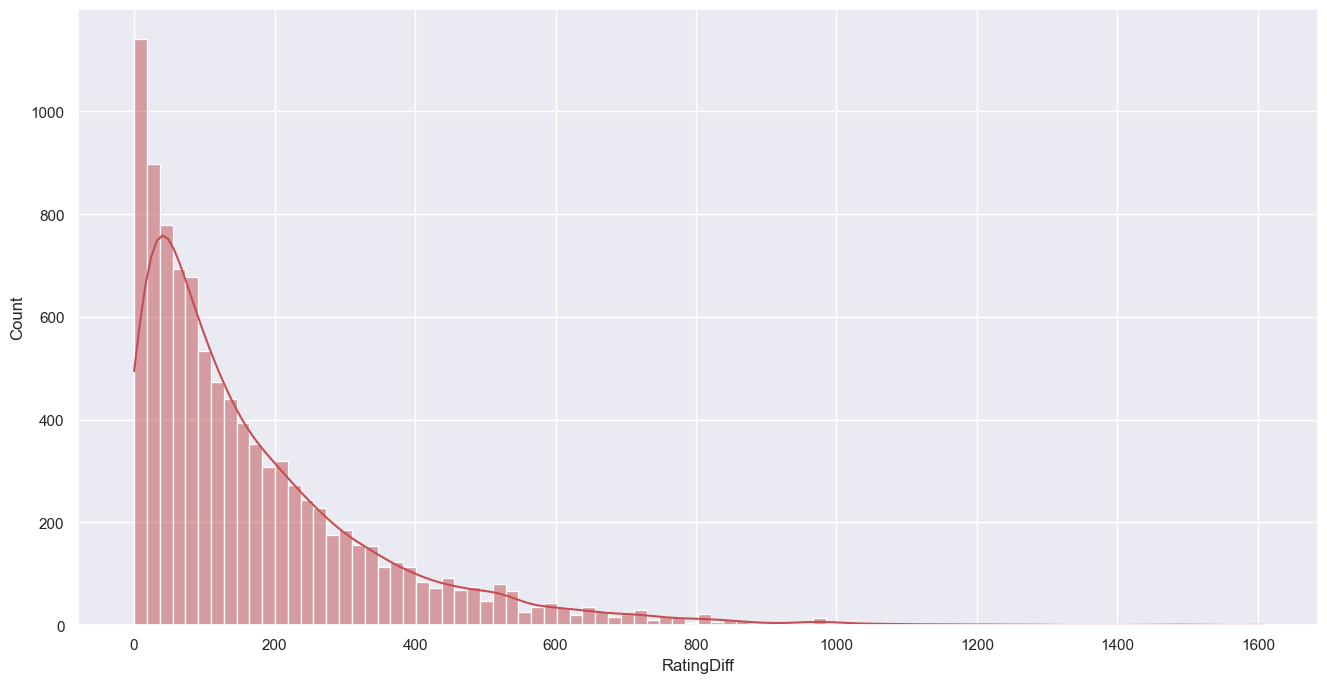

In [459]:
f = plt.figure(figsize=(16, 8))
sb.histplot(abs_RatingDiff,kde=True,color="r")

## Visualise trend in winners with difference in rating

The win rate of a player with higher rating should be obvious but lets visualise it. 

In [460]:
#This function creates a dataframe of winrate, loserate, or drawrate 
#depending on the range of rating difference

def rate1(df, color, result, value_range, ceiling):
    if color == "white":
        rating_range = list(range(0, ceiling, value_range))
        rating_range.append(2001)
    elif color == "black":
        rating_range = list(range(0, -ceiling, -value_range))
        rating_range.append(-2001)
    else:
        raise ValueError("Invalid color value")
    
    results = {"EloRange": [], result: [], "color":[]}
    for i, r in enumerate(rating_range[:-1]):
        if color=="white":
            if i == 0:
                lower, upper = 0, r
            else:
                lower, upper = rating_range[i-1]+1, r
            if color == "white":
                data = df[(df["RatingDiff"] >= lower) & (df["RatingDiff"] <= upper)]
            else:
                data = df[(df["RatingDiff"] <= lower) & (df["RatingDiff"] >= upper)]
            total = len(data)
            win = len(data[data["winner"] == color])
            lose = len(data[data["winner"] != color])
            draw = len(data[data["winner"] == "draw"])
            if total == 0:
                results[result].append(np.nan)
            else:
                if result=="WinRate":
                    results[result].append(win / (total))
                elif result=="LoseRate":
                    results[result].append(lose / (total))
                else:
                    results[result].append(draw / (total))
            if i==0: 
                results["EloRange"].append(f"0")
            elif i == len(rating_range) - 2:
                results["EloRange"].append(f"≥{ceiling}")
            else:
                results["EloRange"].append(f"{lower}to{upper}")
            results["color"].append("white")
            
        else:
            if i == 0:
                lower, upper = 0, r
            else:
                lower, upper = rating_range[i-1]-1, r
            if color == "white":
                data = df[(df["RatingDiff"] >= lower) & (df["RatingDiff"] <= upper)]
            else:
                data = df[(df["RatingDiff"] <= lower) & (df["RatingDiff"] >= upper)]
            total = len(data)
            win = len(data[data["winner"] == color])
            lose = len(data[data["winner"] != color])
            draw = len(data[data["winner"] == "draw"])
            if total == 0:
                results[result].append(np.nan)
            else:
                if result=="WinRate":
                    results[result].append(win / (total))
                elif result=="LoseRate":
                    results[result].append(lose / (total))
                else:
                    results[result].append(draw / (total))
            if i==0: 
                results["EloRange"].append(f"0")
            elif i == len(rating_range) - 2:
                results["EloRange"].append(f"≥{ceiling}")
            else:
                results["EloRange"].append(f"{-lower}to{-upper}")
            results["color"].append("black")
            
    
    return pd.DataFrame(results)




In [461]:
w_winrate=rate1(chess_df,color="white",result="WinRate",value_range=50,ceiling=701)
b_winrate=rate1(chess_df,color="black",result="WinRate",value_range=50,ceiling=701)

data1=w_winrate.copy()
data2=b_winrate.copy()

data3=pd.concat([data1,data2],ignore_index=True,axis=0)

<AxesSubplot:xlabel='EloRange', ylabel='WinRate'>

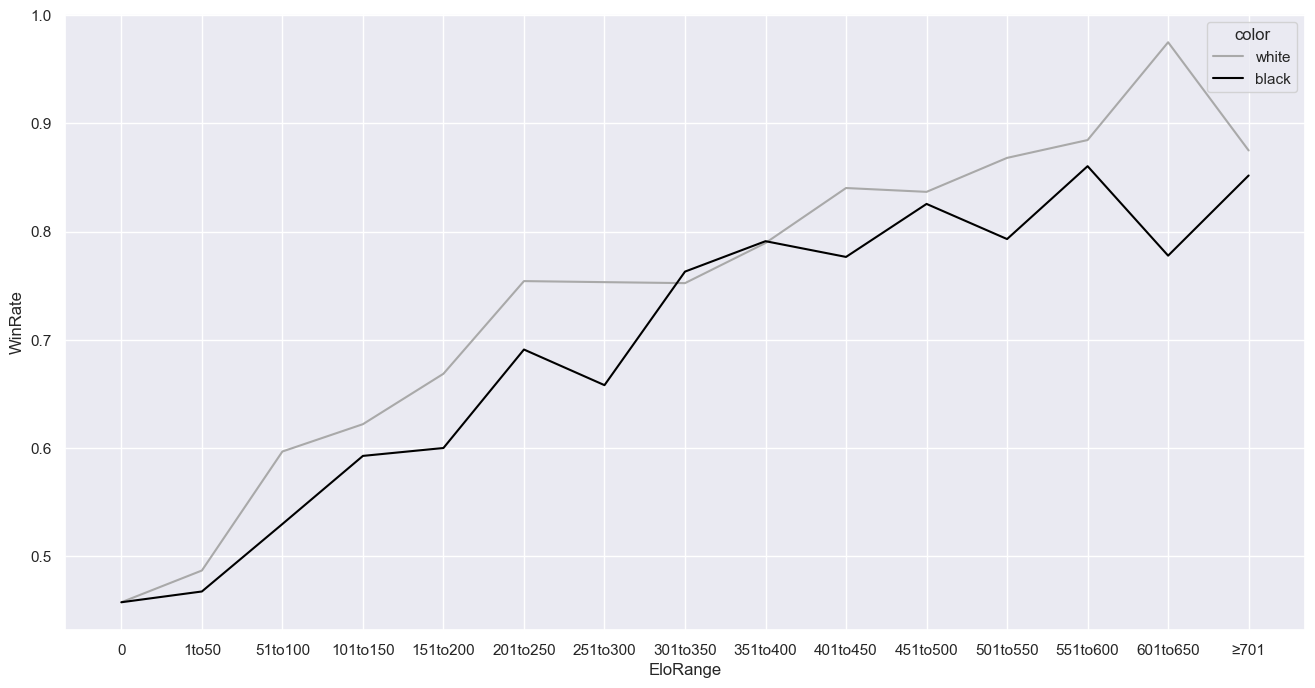

In [462]:
f = plt.figure(figsize=(16, 8),)
sb.lineplot(data=data3,x="EloRange",y="WinRate",hue="color",palette=["darkgrey","black"])

The winrate increases with rating differences for both white and black side.\
Overall, white seems to have the advantage. This also means that black has an overall higher percentage of upsets.

In [463]:
w_loserate=rate1(chess_df,color="white",result="LoseRate",value_range=50,ceiling=701)
b_loserate=rate1(chess_df,color="black",result="LoseRate",value_range=50,ceiling=701)


data1=w_loserate.copy()
data2=b_loserate.copy()

data4=pd.concat([data1,data2],ignore_index=True,axis=0)

<AxesSubplot:xlabel='EloRange', ylabel='LoseRate'>

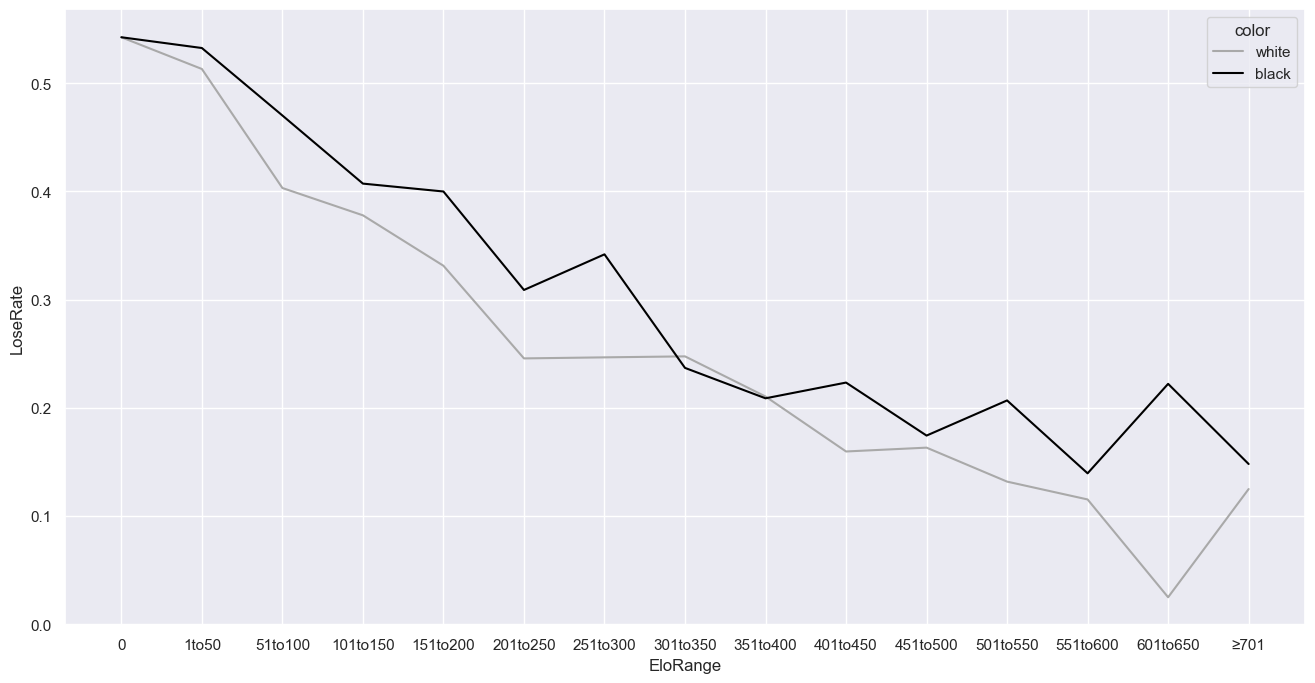

In [464]:
f = plt.figure(figsize=(16, 8))
sb.lineplot(data=data4,x="EloRange",y="LoseRate",hue="color",palette=["darkgrey","black"])

The loserate or "upset" rate is just the winrate flipped upside down. Generally, black has a higher chance of upset. Upset refers to a loss despite the higher ratings advantage.
Next we look at the draw rate to see if there are any trends.

In [465]:
b_drawrate=rate1(chess_df,color="black",result="DrawRate",value_range=50,ceiling=701)
w_drawrate=rate1(chess_df,color="white",result="DrawRate",value_range=50,ceiling=701)

data1=w_drawrate.copy()
data2=b_drawrate.copy()

data5=pd.concat([data1,data2],ignore_index=True,axis=0)

<AxesSubplot:xlabel='EloRange', ylabel='DrawRate'>

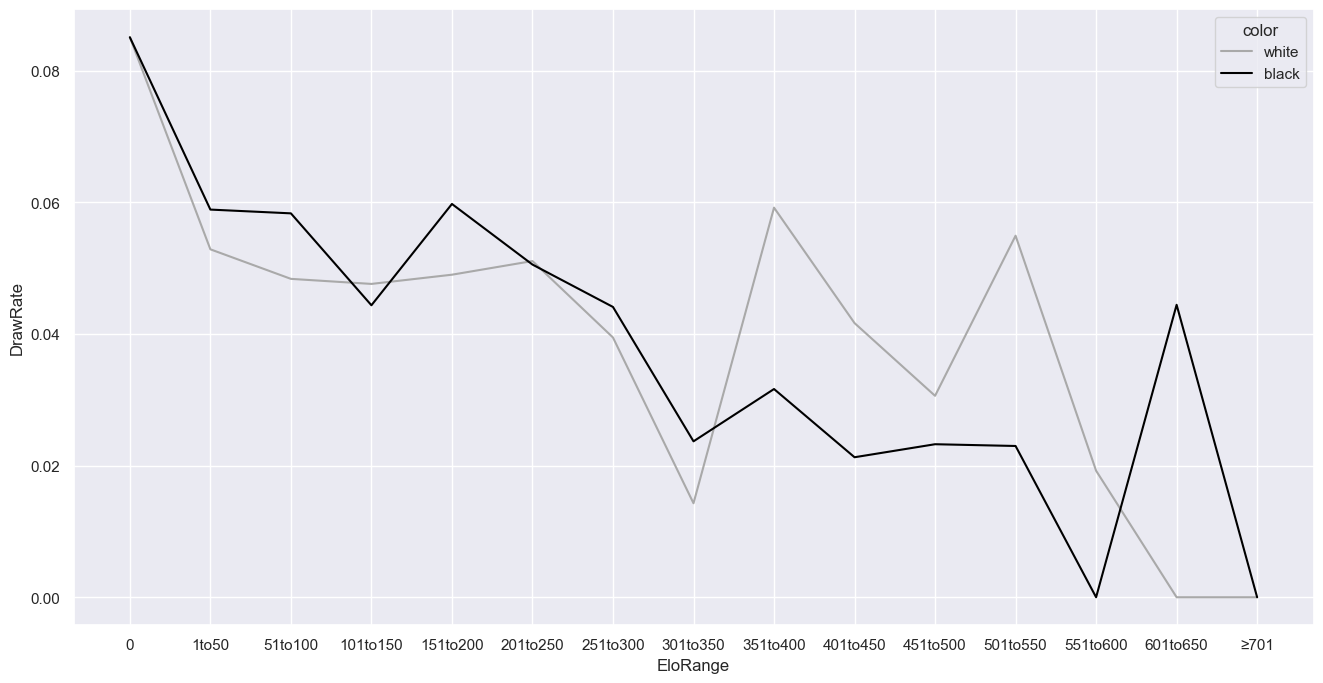

In [466]:
f = plt.figure(figsize=(16, 8))
sb.lineplot(data=data5,x="EloRange",y="DrawRate",hue="color",palette=["darkgrey","black"])

Generally, draw rate decreases with the rating difference.
Black shows a higher draw rate at lower rating difference but white shows increasing draw rate when the rating difference is more than 400.

In [467]:
moves = chess_df.moves.str.split(n=2, expand=True)
moves

,0,1,2
0,c4,Nf6,Nc3 e6 d4 Bb4 e3 O-O Nf3 c5 Bd3 Qa5 Bd2 Nc6 a3...
1,d4,Nf6,Nc3 e6 e4 d5 e5 Nfd7 f4 c5 Nf3 cxd4 Nxd4 Nc6 N...
2,e4,e5,Nf3 f5 d3 Nf6 exf5 Nc6 Bg5 d5 Nc3 Be7 Be2 Bxf5...
3,e4,e5,Nf3 Nc6 Bc4 Bc5 O-O Nf6
4,e4,c5,Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Bg5 e6 Bc4 Be7 ...
...,...,...,...
9803,d4,g6,c4 Bg7 Nc3 c6 e4 d6 f3 Nf6 Bd3 Nbd7 Be3 h6 Qd2...
9804,d4,d5,c4 dxc4 e3 b5 a4 c6 axb5 cxb5 Qf3 e5 Qxa8 Qb6
9805,e4,f6,Bc4 c6 Bxg8 Rxg8 Qh5+ g6 Qxh7 Bg7 Qxg8+ Bf8 Qxg6#
9806,e4,d5,Nf3 dxe4 Nd4 Qxd4 c3 Qb6 d4 c5 Be3 Nf6 dxc5 Qx...


Now we will find the probablity of white winning, based on white's first move.

In [468]:
chess_df['white_1move'] = moves[0]
chess_df['black_1move']= moves[1]
chess_df_wm = pd.crosstab(chess_df.white_1move, columns = chess_df.winner, normalize = 'index')
chess_df_wm.head()

winner,black,draw,white
white_1move,,,
Na3,0.500000,0.000000,0.500000
Nc3,0.490196,0.000000,0.509804
Nf3,0.416438,0.087671,0.495890
Nh3,0.375000,0.000000,0.625000
a3,0.388889,0.055556,0.555556


In [469]:
dict(chess_df_wm['white'])
chess_df['white_1move'] = chess_df['white_1move'].map(dict(chess_df_wm['white']))

Now we will find the probablity of whites winning, based on blacks' first move.

In [470]:
chess_df_bm = pd.crosstab(chess_df.black_1move, columns = chess_df.winner, normalize = 'index')
chess_df_bm.head()

winner,black,draw,white
black_1move,,,
Na6,0.000000,0.000000,1.000000
Nc6,0.359788,0.058201,0.582011
Nf6,0.479092,0.068100,0.452808
Nh6,0.142857,0.000000,0.857143
a5,0.375000,0.125000,0.500000


In [471]:
dict(chess_df_bm['white'])
chess_df['black_1move'] = chess_df['black_1move'].map(dict(chess_df_bm['white']))

In [472]:
chess_df_ = pd.crosstab(chess_df.opening_eco, columns = chess_df.winner, normalize = 'index')
chess_df_

winner,black,draw,white
opening_eco,,,
A00,0.575884,0.033264,0.390852
A01,0.520548,0.027397,0.452055
A02,0.400000,0.114286,0.485714
A03,0.470588,0.029412,0.500000
A04,0.381944,0.097222,0.520833
...,...,...,...
E91,0.000000,0.500000,0.500000
E92,0.250000,0.500000,0.250000
E94,0.600000,0.000000,0.400000


In [473]:
dict(chess_df_['white'])

{'A00': 0.3908523908523909,
 'A01': 0.4520547945205479,
 'A02': 0.4857142857142857,
 'A03': 0.5,
 'A04': 0.5208333333333334,
 'A05': 0.2222222222222222,
 'A06': 0.5517241379310345,
 'A07': 0.5333333333333333,
 'A08': 0.65,
 'A09': 0.5,
 'A10': 0.48333333333333334,
 'A11': 0.6666666666666666,
 'A12': 0.0,
 'A13': 0.6,
 'A15': 0.5,
 'A16': 0.6666666666666666,
 'A17': 0.4,
 'A18': 0.8,
 'A20': 0.6458333333333334,
 'A21': 0.6333333333333333,
 'A22': 0.3333333333333333,
 'A23': 1.0,
 'A24': 0.0,
 'A25': 0.8333333333333334,
 'A27': 0.8,
 'A28': 0.5,
 'A29': 0.6666666666666666,
 'A30': 0.5555555555555556,
 'A31': 0.0,
 'A33': 0.0,
 'A34': 0.42857142857142855,
 'A35': 0.6666666666666666,
 'A36': 0.8,
 'A38': 0.25,
 'A39': 1.0,
 'A40': 0.593103448275862,
 'A41': 0.6111111111111112,
 'A42': 0.5,
 'A43': 0.4864864864864865,
 'A44': 1.0,
 'A45': 0.3865546218487395,
 'A46': 0.30952380952380953,
 'A47': 0.25,
 'A48': 0.45,
 'A49': 0.5833333333333334,
 'A50': 0.5384615384615384,
 'A51': 0.2,
 'A52': 

In [474]:
chess_df['opening_eco']= chess_df['opening_eco'].map(dict(chess_df_['white']))
chess_df.head()

,Unnamed: 0,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,EstDur,Event,RatingDiff,white_1move,black_1move
0,10164,False,23,resign,white,10+0,1886,1590,c4 Nf6 Nc3 e6 d4 Bb4 e3 O-O Nf3 c5 Bd3 Qa5 Bd2...,1.000000,Nimzo-Indian Defense: Normal Variation | Hueb...,10,600,Rapid,296,0.540059,0.452808
1,15917,True,108,mate,black,10+0,1886,1864,d4 Nf6 Nc3 e6 e4 d5 e5 Nfd7 f4 c5 Nf3 cxd4 Nxd...,0.400000,French Defense: Steinitz Variation #2,11,600,Rapid,22,0.516659,0.452808
2,16581,True,48,resign,black,10+0,1873,1913,e4 e5 Nf3 f5 d3 Nf6 exf5 Nc6 Bg5 d5 Nc3 Be7 Be...,0.590717,Latvian Gambit,4,600,Rapid,-40,0.508379,0.530219
3,18640,False,8,outoftime,black,20+15,1586,2481,e4 e5 Nf3 Nc6 Bc4 Bc5 O-O Nf6,0.461538,Giuoco Piano,6,1800,Classical,-895,0.508379,0.530219
4,11820,True,64,mate,black,10+0,1610,1635,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Bg5 e6 Bc...,0.500000,Sicilian Defense: Najdorf Variation,12,600,Rapid,-25,0.508379,0.438337


In [475]:
chess_df.white_1move.nunique()

18

In [476]:
chess_df.black_1move.nunique()

20

In [477]:
chess_df.isnull().sum()

Unnamed: 0        0
rated             0
turns             0
victory_status    0
winner            0
increment_code    0
white_rating      0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
EstDur            0
Event             0
RatingDiff        0
white_1move       0
black_1move       9
dtype: int64

From the above,we can see that there are 9 rows where there is a NaN value,we will then proceed to remove these rows

In [478]:
print(chess_df[chess_df.isnull().any(axis=1)])

      Unnamed: 0  rated  turns victory_status winner increment_code  \
1577        5496  False      1      outoftime  white           5+15   
3049       13557  False      1      outoftime  white          20+10   
3620        1977  False      1      outoftime  white          10+60   
6869        6040  False      1      outoftime  white          60+60   
7216        5875   True      1         resign  white           10+0   
7357       11963  False      1      outoftime  white          15+30   
8365       12679  False      1      outoftime  white           5+60   
9033        4115  False      1      outoftime  white           5+15   
9291        1946   True      1         resign  black           10+0   

      white_rating  black_rating moves  opening_eco       opening_name  \
1577          2100          1404    e4     0.618243        King's Pawn   
3049          2438          1666    e4     0.618243        King's Pawn   
3620          2032          1223    e4     0.618243        King's P

In [479]:
chess_df = chess_df.drop(index=1577)
chess_df = chess_df.drop(index=3049)
chess_df = chess_df.drop(index=3620)
chess_df = chess_df.drop(index=6869)
chess_df = chess_df.drop(index=7216)
chess_df = chess_df.drop(index=7357)
chess_df = chess_df.drop(index=8365)
chess_df = chess_df.drop(index=9033)
chess_df = chess_df.drop(index=9291)

In [480]:
chess_df.isnull().sum()

Unnamed: 0        0
rated             0
turns             0
victory_status    0
winner            0
increment_code    0
white_rating      0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
EstDur            0
Event             0
RatingDiff        0
white_1move       0
black_1move       0
dtype: int64

Now that there is no more NaN value,we can proceed with converting the variables to numerical.

# Treating Catergorical Values

In [481]:
chess_df['rated'].unique()



array([False,  True])

In [482]:
chess_df['Event'].unique()

array(['Rapid', 'Classical', 'Blitz'], dtype=object)

In [483]:
chess_df.replace({False: 0, True: 1}, inplace=True)

In [484]:
chess_df.replace({'white' : 1, 'black': -1, 'draw': -1}, inplace = True)

In [485]:
chess_df.replace({'Blitz' : 0, 'Rapid': 1, 'Classical': 2}, inplace = True)

In [486]:
print(chess_df.dtypes)

Unnamed: 0          int64
rated               int64
turns               int64
victory_status     object
winner              int64
increment_code     object
white_rating        int64
black_rating        int64
moves              object
opening_eco       float64
opening_name       object
opening_ply         int64
EstDur              int64
Event               int64
RatingDiff          int64
white_1move       float64
black_1move       float64
dtype: object


In [487]:
chess_df.victory_status.unique()

array(['resign', 'mate', 'outoftime', -1], dtype=object)

We will need to remove those variables that are dtype:objects 

In [488]:
chess_df.drop(columns = ['opening_name','victory_status','moves','increment_code','Unnamed: 0','opening_ply'], axis =1, inplace =True)

# Finding the variables with the highest correlation

In [489]:
correlations= chess_df.corr()
n=10
top_n_correlations = correlations.nlargest(n, 'winner')['winner']

In [490]:
print(top_n_correlations)

winner          1.000000
RatingDiff      0.355891
opening_eco     0.224312
white_rating    0.124633
black_1move     0.086544
white_1move     0.072226
Event           0.012873
EstDur          0.002707
rated          -0.007183
turns          -0.090620
Name: winner, dtype: float64


From our analysis,we found that the 5 variables with the highest correlations is RatingDiff, opening_eco, white_rating, white_1move and black_1move.

In [491]:
chess_df.drop(columns = ['turns','EstDur','black_rating','Event','rated'], axis =1, inplace =True)

In [492]:
x=chess_df.drop('winner', axis = 1)

In [493]:
x

,white_rating,opening_eco,RatingDiff,white_1move,black_1move
0,1886,1.000000,296,0.540059,0.452808
1,1886,0.400000,22,0.516659,0.452808
2,1873,0.590717,-40,0.508379,0.530219
3,1586,0.461538,-895,0.508379,0.530219
4,1610,0.500000,-25,0.508379,0.438337
...,...,...,...,...,...
9803,1947,0.593103,163,0.516659,0.431579
9804,1796,0.544643,-9,0.516659,0.507312
9805,1160,0.618243,-163,0.508379,0.708333
9806,1270,0.551724,91,0.508379,0.507312


In [494]:
y = chess_df.winner

In [495]:
y

0       1
1      -1
2      -1
3      -1
4      -1
       ..
9803    1
9804    1
9805    1
9806   -1
9807    1
Name: winner, Length: 9799, dtype: int64

# Test Train DataSet and Scaling

In [496]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0, stratify = y)

In [497]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [498]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Random Forest

In [499]:
print(chess_df.dtypes)

winner            int64
white_rating      int64
opening_eco     float64
RatingDiff        int64
white_1move     float64
black_1move     float64
dtype: object


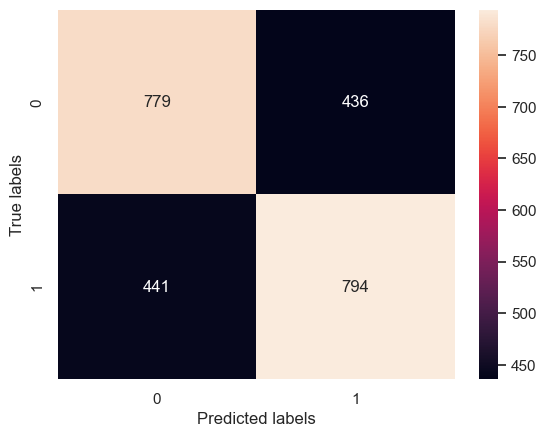

In [500]:
# Create the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(x_train_scaled, y_train)

# Make predictions on the test data
y_pred = rfc.predict(x_test_scaled)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, cmap='rocket', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



In [501]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# get the feature importances
importances = rfc.feature_importances_

importanceDF = pd.DataFrame({"Variable": x_train.columns, "Importance": rfc.feature_importances_})
importanceDF.sort_values(by="Importance", ascending=False)

Accuracy: 0.6420408163265307


,Variable,Importance
2,RatingDiff,0.399155
0,white_rating,0.304108
1,opening_eco,0.179208
4,black_1move,0.070950
3,white_1move,0.046579


Using Random Forest, we can determine that the accuracy of the model is approximately 0.6420408, thus it is somewhat accurate in determining the probability of winning. Moreover, the variable that has the highest importance value is RatingDiff.

# Logistic Regression

In [502]:
modellr = LogisticRegression(class_weight = 'balanced',max_iter = 1e10)
modellr.fit(x_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000000000.0)

In [503]:
y_pred = modellr.predict(x_test_scaled)

# calculate the accuracy of the classifier
accuracy = modellr.score(x_test_scaled, y_test)

# print the accuracy of the classifier
print("Accuracy of the logistic regression classifier:", accuracy)

# Get the feature names
feature_names = x_train.columns

# Print the coefficient values and corresponding feature names
for coef, feat in zip(modellr.coef_[0], feature_names):
    print(f'{feat}: {coef:.4f}')



Accuracy of the logistic regression classifier: 0.6583673469387755
white_rating: -0.0855
opening_eco: 0.4313
RatingDiff: 0.9133
white_1move: 0.0479
black_1move: 0.0504


After using Logistic Regression, we can see that with an accuracy value of approximately 0.6583673, it is a slightly more accurate model in predicting the probability of winning. Also, just like the Random Forest model, the RatingDiff has the highest importance in predicting the outcome. 

# Conclusion

From the analysis that we have done using the different Machine Learning Models, we can see that the Rating difference between the players play the most important role in determining the probability of the white player winning.  